In [1]:
import os, shutil

In [2]:
# 원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = '../kaggle_data/dogs-vs-cats/raw/train/'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = '../kaggle_data/dogs-vs-cats/output/small'
if os.path.exists(base_dir):  # 반복적인 실행을 위해 디렉토리를 삭제합니다.
    shutil.rmtree(base_dir)   # 이 코드는 책에 포함되어 있지 않습니다.
os.mkdir(base_dir)

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 test_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [4]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [5]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/Users/seulgi/opt/miniforge3/envs/tensorflow/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [6]:
from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일을 조정합니다
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, # 타깃 디렉터리
    target_size=(150, 150), # 모든 이미지를 150 × 150 크기로 바꿉니다
    batch_size=20,
    class_mode='binary') # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요합니다

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


In [8]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30


/var/folders/5f/yjnhj9j16q147nd77d5r9c4m0000gn/T/ipykernel_88897/3259228942.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(
2022-09-06 12:16:41.659104: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-06 12:16:42.074512: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 0.6889 - acc: 0.5410

2022-09-06 12:16:51.626267: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 12s 80ms/step - loss: 0.6889 - acc: 0.5410 - val_loss: 0.6686 - val_acc: 0.6260
Epoch 2/30
100/100 [==============================] - 8s 79ms/step - loss: 0.6488 - acc: 0.6110 - val_loss: 0.6342 - val_acc: 0.6280
Epoch 3/30
100/100 [==============================] - 8s 78ms/step - loss: 0.5950 - acc: 0.6810 - val_loss: 0.6042 - val_acc: 0.6740
Epoch 4/30
100/100 [==============================] - 8s 76ms/step - loss: 0.5556 - acc: 0.7205 - val_loss: 0.5974 - val_acc: 0.6600
Epoch 5/30
100/100 [==============================] - 7s 73ms/step - loss: 0.5300 - acc: 0.7390 - val_loss: 0.6155 - val_acc: 0.6750
Epoch 6/30
100/100 [==============================] - 8s 75ms/step - loss: 0.5125 - acc: 0.7435 - val_loss: 0.5718 - val_acc: 0.6930
Epoch 7/30
100/100 [==============================] - 7s 73ms/step - loss: 0.4825 - acc: 0.7685 - val_loss: 0.5619 - val_acc: 0.6950
Epoch 8/30
100/100 [==============================] - 7s 75ms/step - loss: 0.45

In [9]:
model.save(base_dir+'/cats_and_dogs_small_1.h5')

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

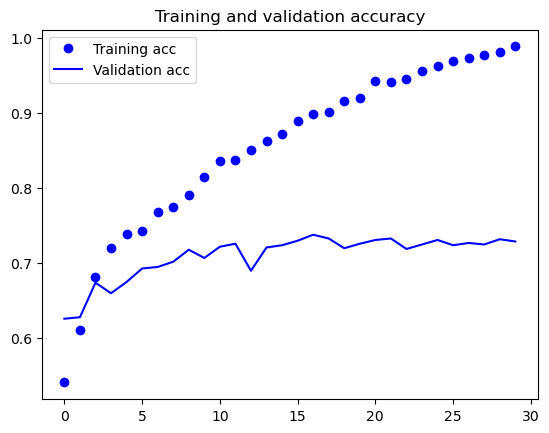

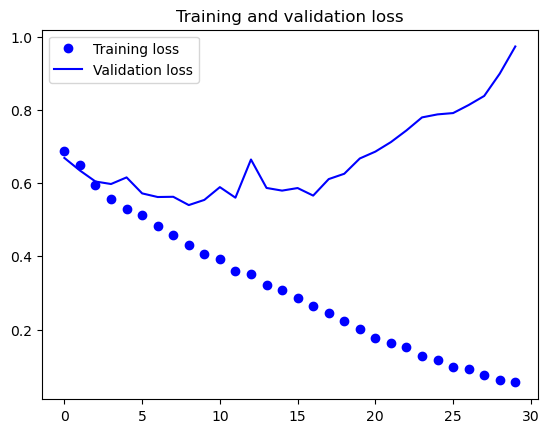

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [19]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

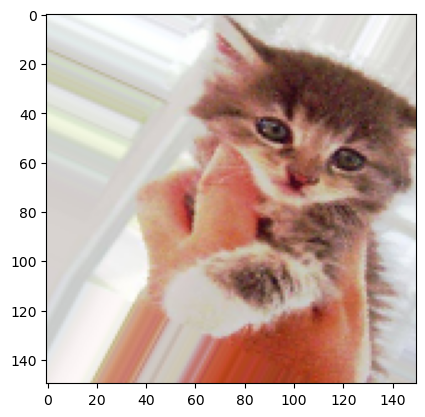

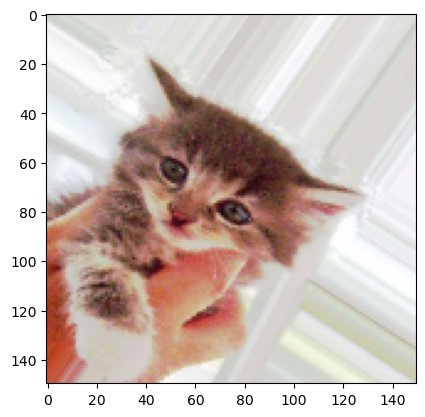

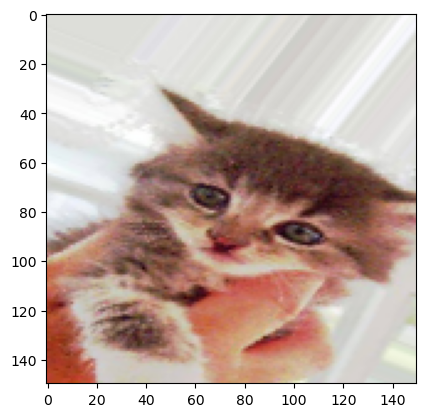

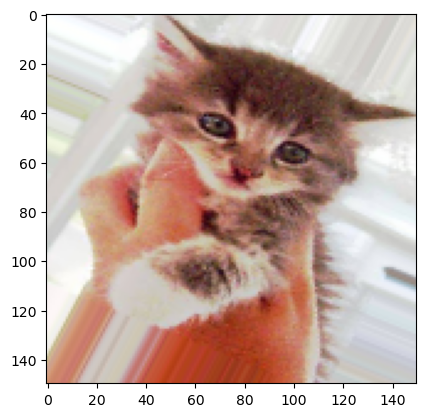

In [20]:
# 이미지 전처리 유틸리티 모듈
from tensorflow.keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

# 증식할 이미지 선택합니다
img_path = fnames[3]

# 이미지를 읽고 크기를 변경합니다
img = image.load_img(img_path, target_size=(150, 150))

# (150, 150, 3) 크기의 넘파이 배열로 변환합니다
x = image.img_to_array(img)

# (1, 150, 150, 3) 크기로 변환합니다
x = x.reshape((1,) + x.shape)

# flow() 메서드는 랜덤하게 변환된 이미지의 배치를 생성합니다.
# 무한 반복되기 때문에 어느 지점에서 중지해야 합니다!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [127]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam', #optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [128]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100


/var/folders/5f/yjnhj9j16q147nd77d5r9c4m0000gn/T/ipykernel_88897/2960275455.py:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(
2022-09-06 14:49:15.189091: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 0.6975 - acc: 0.5100

2022-09-06 14:49:23.783216: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 10s 95ms/step - loss: 0.6975 - acc: 0.5100 - val_loss: 0.6850 - val_acc: 0.5720
Epoch 2/100
100/100 [==============================] - 10s 98ms/step - loss: 0.6926 - acc: 0.5125 - val_loss: 0.6930 - val_acc: 0.5060
Epoch 3/100
100/100 [==============================] - 10s 96ms/step - loss: 0.6933 - acc: 0.5090 - val_loss: 0.6928 - val_acc: 0.5000
Epoch 4/100
100/100 [==============================] - 9s 92ms/step - loss: 0.6933 - acc: 0.5115 - val_loss: 0.6940 - val_acc: 0.4940
Epoch 5/100
100/100 [==============================] - 9s 87ms/step - loss: 0.6929 - acc: 0.5130 - val_loss: 0.6918 - val_acc: 0.5170
Epoch 6/100
100/100 [==============================] - 9s 86ms/step - loss: 0.6929 - acc: 0.5245 - val_loss: 0.6930 - val_acc: 0.5000
Epoch 7/100
100/100 [==============================] - 9s 86ms/step - loss: 0.6881 - acc: 0.5235 - val_loss: 0.6601 - val_acc: 0.5950
Epoch 8/100
100/100 [==============================] - 9s 88ms/step - l

Epoch 62/100
100/100 [==============================] - 9s 86ms/step - loss: 0.4559 - acc: 0.7860 - val_loss: 0.4562 - val_acc: 0.7930
Epoch 63/100
100/100 [==============================] - 10s 95ms/step - loss: 0.4488 - acc: 0.7935 - val_loss: 0.4520 - val_acc: 0.7960
Epoch 64/100
100/100 [==============================] - 9s 87ms/step - loss: 0.4334 - acc: 0.8030 - val_loss: 0.4716 - val_acc: 0.7780
Epoch 65/100
100/100 [==============================] - 9s 90ms/step - loss: 0.4440 - acc: 0.7880 - val_loss: 0.4469 - val_acc: 0.8020
Epoch 66/100
100/100 [==============================] - 9s 85ms/step - loss: 0.4292 - acc: 0.7980 - val_loss: 0.4609 - val_acc: 0.7750
Epoch 67/100
100/100 [==============================] - 9s 90ms/step - loss: 0.4163 - acc: 0.8075 - val_loss: 0.4368 - val_acc: 0.7990
Epoch 68/100
100/100 [==============================] - 9s 87ms/step - loss: 0.4326 - acc: 0.8040 - val_loss: 0.4262 - val_acc: 0.8060
Epoch 69/100
100/100 [==============================] 

In [129]:
model.save(base_dir+'/cats_and_dogs_small_2.h5')

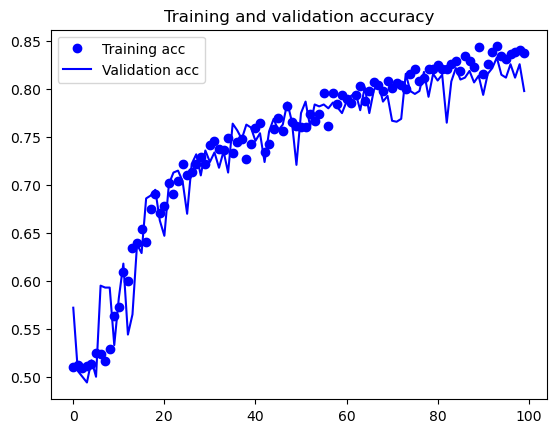

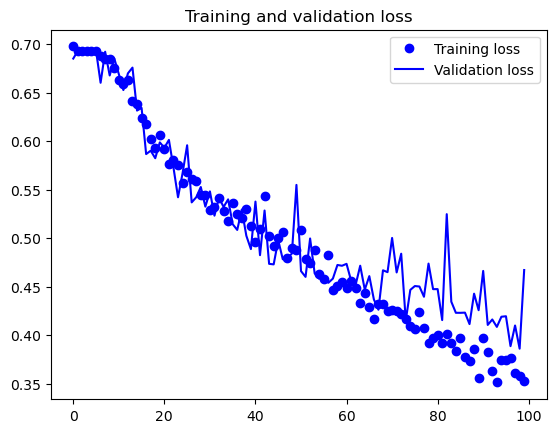

In [130]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [131]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
model.evaluate(test_generator)

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 2s 29ms/step - loss: 0.5127 - acc: 0.7770


[0.5127050876617432, 0.7770000100135803]

In [155]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from PIL import Image
test_generator.shuffle = False
pred = model.predict(test_generator)

50/50 [==============================] - 1s 28ms/step


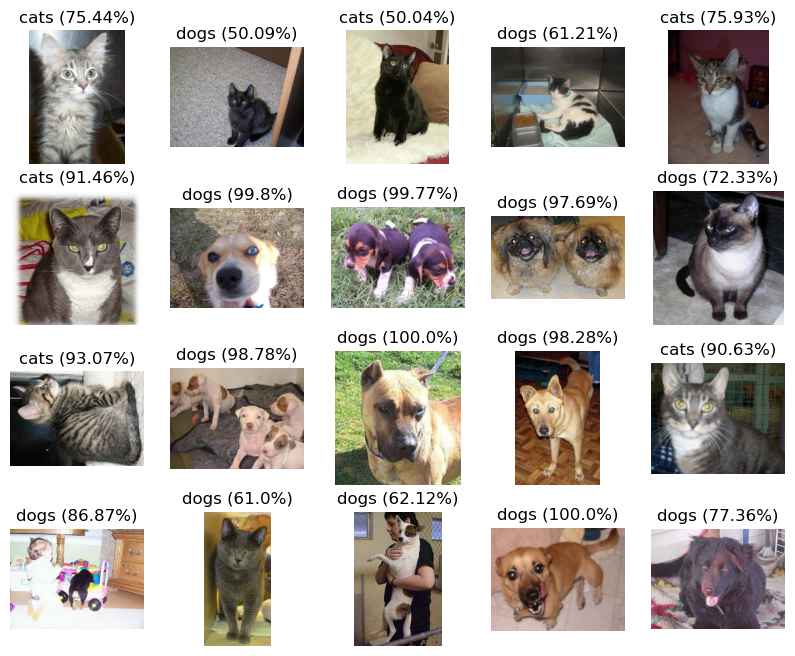

In [178]:
# 학습된 결과를 출력하는 부분입니다.
random_test = np.random.randint(test_generator.samples, size=20)  # 테스트할 이미지를 랜덤하게 불러옵니다.

plt.figure(figsize=(10, 8))                         # 출력될 이미지의 크기를 정합니다.
class_indices = {0:'cats', 1:'dogs'}

for i, image_idx in enumerate(random_test):       # 랜덤하게 뽑은 이미지를 차례로 나열합니다.
    ax = plt.subplot(4, 5, i+1)
    img = Image.open(test_generator._filepaths[image_idx])
    plt.imshow(img)
    prob = round(float(pred[image_idx])*100,2)
    cls = round(float(pred[image_idx]))
    if cls == 0:
        prob = round(100 - prob,2)
    plt.title(f'{class_indices[cls]} ({prob}%)')
    ax.axis('off')
plt.show()

Found 10 images belonging to 2 classes.
1/1 [==============================] - 0s 180ms/step


Text(0.5, 1.0, 'Cats (82.63%)')

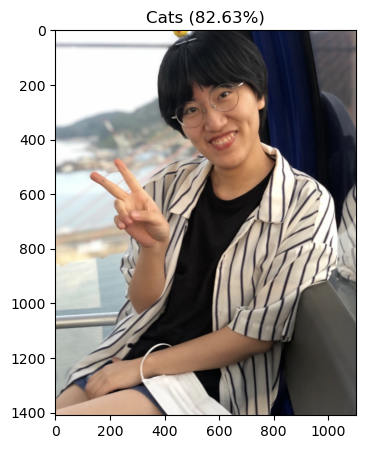

In [255]:
import cv2

test_img_dir = '../kaggle_data/dogs-vs-cats/myimage/'
test_img_generator = test_datagen.flow_from_directory(
        test_img_dir,
        target_size=(150, 150),
        class_mode='binary')

# test_img_file = '../kaggle_data/dogs-vs-cats/myimage/loma.png'
# img_data = cv2.imread(test_img_file, cv2.IMREAD_COLOR)
# img = test_datagen.flow(img_data)
#                         target_size=(150,150),
#                         class_mode='binary')
pred = model.predict(test_img_generator)

# test_img_generator.__dict__

idx = 7
plt.figure(figsize=(5,5))
img = Image.open(test_img_generator._filepaths[idx])
plt.imshow(img)
cls = 'Cats' if pred[idx] < 0.5 else 'Dogs'
prob = round(float(pred[idx])*100,2)
if cls == 'Cats':
    prob = round((1-float(pred[idx]))*100,2)
plt.title(cls+f' ({prob}%)')

In [240]:
from tf_explain.core.grad_cam import GradCAM
from tf_explain.core.occlusion_sensitivity import OcclusionSensitivity
from tensorflow.keras.preprocessing.image import load_img, img_to_array

explainer = GradCAM()

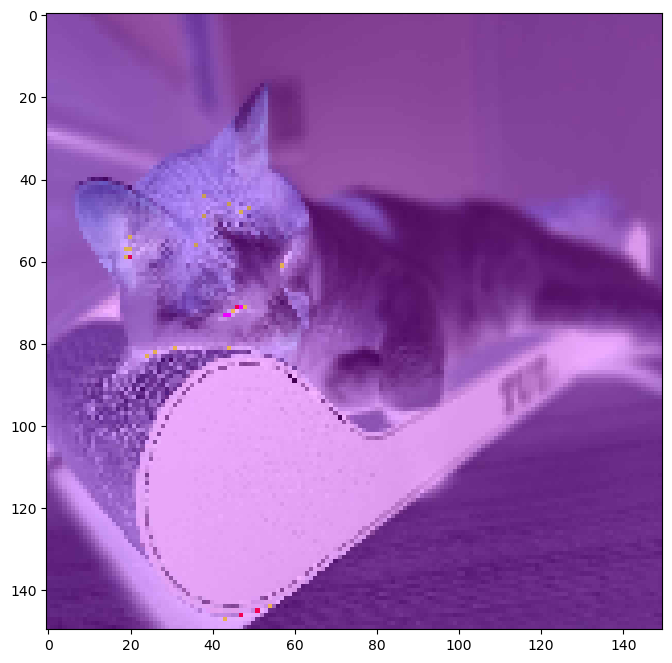

In [244]:
# 그레이디언트 CAM 알고리즘 실행
test_img_file = '../kaggle_data/dogs-vs-cats/myimage/cats/loma.jpg'
imge = load_img(test_img_file, target_size=(150, 150)) # 이미지를 불러오고 내부에서 처리될 이미지의 크기를 설정합니다. 
img = img_to_array(img) # 이미지를 넘파이 배열로 바꾸어 줍니다.
data = ([img], None)
grid = explainer.explain(data, model, 0)                 # 그레이디언트 CAM이 실행되는 부분입니다. 
# 그레이디언트 CAM 알고리즘이 적용된 이미지를 불러오는 부분의 시작입니다.
plt.figure(figsize=(8,8))
plt.imshow(grid)